In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
##Training image processing
training_set = tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 70295 files belonging to 38 classes.


In [3]:
##Validation image processing
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


In [4]:
training_set

<_BatchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 38), dtype=tf.float32, name=None))>

In [5]:
## Used for seeing the structure of training set
for x,y in training_set:
    print(x,x.shape)
    print(y,y.shape)
    break

tf.Tensor(
[[[[130.75 177.75 145.75]
   [135.5  182.5  150.5 ]
   [136.5  183.5  151.5 ]
   ...
   [116.25 168.25 146.25]
   [107.75 159.75 137.75]
   [106.5  158.5  136.5 ]]

  [[119.5  169.   136.75]
   [121.5  171.   138.75]
   [123.5  173.   140.75]
   ...
   [111.25 163.25 141.25]
   [100.75 152.75 130.75]
   [110.   162.   140.  ]]

  [[113.   166.5  134.75]
   [114.   167.5  135.75]
   [115.5  169.   137.25]
   ...
   [106.25 158.25 136.25]
   [111.25 163.25 141.25]
   [112.75 164.75 142.75]]

  ...

  [[ 58.75 100.5   54.75]
   [ 59.   103.    56.5 ]
   [ 57.   101.25  55.  ]
   ...
   [ 75.5  126.5   95.5 ]
   [ 78.75 129.75  96.75]
   [ 83.75 134.75 101.75]]

  [[ 49.    98.5   51.5 ]
   [ 50.5  100.    53.5 ]
   [ 50.75 100.25  54.75]
   ...
   [ 83.5  134.5  103.5 ]
   [ 75.   126.    95.  ]
   [ 90.   141.   110.  ]]

  [[ 49.25 103.75  57.25]
   [ 47.75 102.25  57.25]
   [ 46.    99.    55.  ]
   ...
   [ 82.   133.   102.  ]
   [ 76.25 127.25  96.25]
   [ 88.25 139.25 10

Building Model

To avoid overshooting 
1.Choose small learning rate default 0.001 we are taking 0.0001 
2.There may be chance of Underfitting, so increase number of neuron 
3.Add more Convolution layer to extract more feature from images there may be possibility that model unable to capture relevant feature or model is confusingdue to lack of feature so feaad with more feature

In [6]:
from tensorflow.keras.layers import Dense,Conv2D,Flatten,MaxPool2D,Flatten,Dropout
from tensorflow.keras. models import Sequential

In [7]:
model=Sequential()

Building Convolution Layer

In [8]:
model.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
model.add(Conv2D(filters=32,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [9]:
model.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=64,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [10]:
model.add(Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=128,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [11]:
model.add(Conv2D(filters=258,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=258,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [12]:
model.add(Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=512,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [13]:
model.add(Dropout(0.25)) #To avoid overfititing

In [14]:
model.add(Flatten())

In [15]:
model.add(Dense(units=1500,activation='relu'))

In [16]:
model.add(Dropout(0.4))

In [17]:
#Output Layer
model.add(Dense(units=38,activation='softmax'))

Compiling model

In [18]:
model.compile(optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 126, 126, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 32)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 63, 63, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 61, 61, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                   

Training the Model

In [20]:
training_history = model.fit(x=training_set,validation_data=validation_set,epochs=3)

Epoch 1/3
2197/2197 [==============================] - 4576s 2s/step - loss: 1.3125 - accuracy: 0.6153 - val_loss: 0.6716 - val_accuracy: 0.7922
Epoch 2/3
2197/2197 [==============================] - 4563s 2s/step - loss: 0.4392 - accuracy: 0.8611 - val_loss: 0.2812 - val_accuracy: 0.9096
Epoch 3/3
2197/2197 [==============================] - 4454s 2s/step - loss: 0.2651 - accuracy: 0.9146 - val_loss: 0.2005 - val_accuracy: 0.9339


Evaluating the Model

In [21]:
#Model evalution on training set
train_loss,train_acc = model.evaluate(training_set)

2197/2197 [==============================] - 816s 371ms/step - loss: 0.1281 - accuracy: 0.9585


In [22]:
print(train_loss,train_acc)

0.1281072348356247 0.9584892392158508


In [23]:
#Model on Validaton set
val_loss,val_acc=model.evaluate(validation_set)

550/550 [==============================] - 197s 357ms/step - loss: 0.2005 - accuracy: 0.9339


In [24]:
print(val_loss,val_acc)

0.20052719116210938 0.9338720440864563


Saving the Model

In [34]:
model.save("trained_model.keras")

In [35]:
model.save("trained_model.h5")

In [36]:
training_history.history

{'loss': [1.3124831914901733, 0.4392228126525879, 0.26506975293159485],
 'accuracy': [0.6152642369270325, 0.8610712289810181, 0.914631187915802],
 'val_loss': [0.6716163158416748, 0.28116297721862793, 0.20052722096443176],
 'val_accuracy': [0.792226254940033, 0.9096289277076721, 0.9338720440864563]}

In [37]:
#Recording History in json
import json
with open("training_hist.json","w") as f:
    json.dump(training_history.history,f)

In [38]:
training_history.history["accuracy"]

[0.6152642369270325, 0.8610712289810181, 0.914631187915802]

In [40]:
training_history.history["val_accuracy"]

[0.792226254940033, 0.9096289277076721, 0.9338720440864563]

Accuracy Visualization

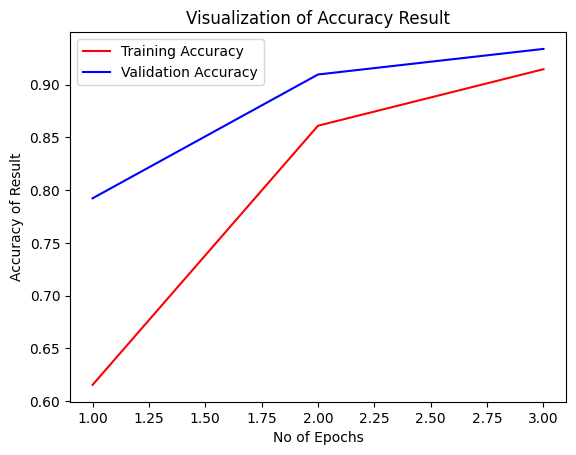

In [41]:
epochs=[i for i in range(1,4)]
plt.plot(epochs,training_history.history["accuracy"],color='red',label="Training Accuracy")
plt.plot(epochs,training_history.history["val_accuracy"],color='blue',label="Validation Accuracy")
plt.xlabel("No of Epochs")
plt.ylabel("Accuracy of Result")
plt.title("Visualization of Accuracy Result")
plt.legend()
plt.show()

Other Metrices for Model Evaluation

In [79]:
class_name=validation_set.class_names
class_name

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

In [80]:
test_set=tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


In [81]:
y_pred = model.predict(test_set)
y_pred,y_pred.shape

550/550 [==============================] - 173s 315ms/step


(array([[9.99618292e-01, 1.50964320e-06, 1.47902286e-08, ...,
         1.02148590e-09, 3.75680403e-10, 3.97262241e-08],
        [9.99768913e-01, 1.29704304e-05, 3.40042128e-08, ...,
         5.22730914e-10, 1.60034472e-10, 1.97340668e-08],
        [9.99549925e-01, 5.53057866e-08, 5.38634826e-09, ...,
         1.10772919e-11, 2.02382847e-10, 9.08049103e-09],
        ...,
        [1.00608206e-08, 6.49219220e-11, 1.71784595e-08, ...,
         6.69647601e-11, 1.75189252e-10, 9.99996543e-01],
        [8.90521168e-09, 7.41193495e-11, 8.34586267e-09, ...,
         8.47015375e-11, 1.51315974e-10, 9.99997616e-01],
        [4.94072949e-10, 1.33627215e-11, 2.07504239e-11, ...,
         4.38921078e-12, 8.27588842e-09, 9.99987602e-01]], dtype=float32),
 (17572, 38))

In [86]:
predicted_categories=tf.argmax(y_pred,axis=1)
predicted_categories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [87]:
true_categories=tf.concat([y for x,y in test_set],axis=0)
true_categories

<tf.Tensor: shape=(17572, 38), dtype=float32, numpy=
array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)>

In [88]:
y_true=tf.argmax(y_pred,axis=1)
y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [89]:
from sklearn.metrics import classification_report,confusion_matrix

In [90]:
print(classification_report(y_true,predicted_categories,target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       1.00      1.00      1.00       487
                                 Apple___Black_rot       1.00      1.00      1.00       525
                          Apple___Cedar_apple_rust       1.00      1.00      1.00       385
                                   Apple___healthy       1.00      1.00      1.00       509
                               Blueberry___healthy       1.00      1.00      1.00       499
          Cherry_(including_sour)___Powdery_mildew       1.00      1.00      1.00       409
                 Cherry_(including_sour)___healthy       1.00      1.00      1.00       446
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       1.00      1.00      1.00       437
                       Corn_(maize)___Common_rust_       1.00      1.00      1.00       473
               Corn_(maize)___Northern_Leaf_Blight       1.00      1.00      1.

In [91]:
cm = confusion_matrix(y_true,predicted_categories)
cm

array([[487,   0,   0, ...,   0,   0,   0],
       [  0, 525,   0, ...,   0,   0,   0],
       [  0,   0, 385, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ..., 478,   0,   0],
       [  0,   0,   0, ...,   0, 461,   0],
       [  0,   0,   0, ...,   0,   0, 454]], dtype=int64)

Confusion_Matrix Visualization

<Axes: title={'center': 'Plant Disease Detection Confusion Matrix'}>

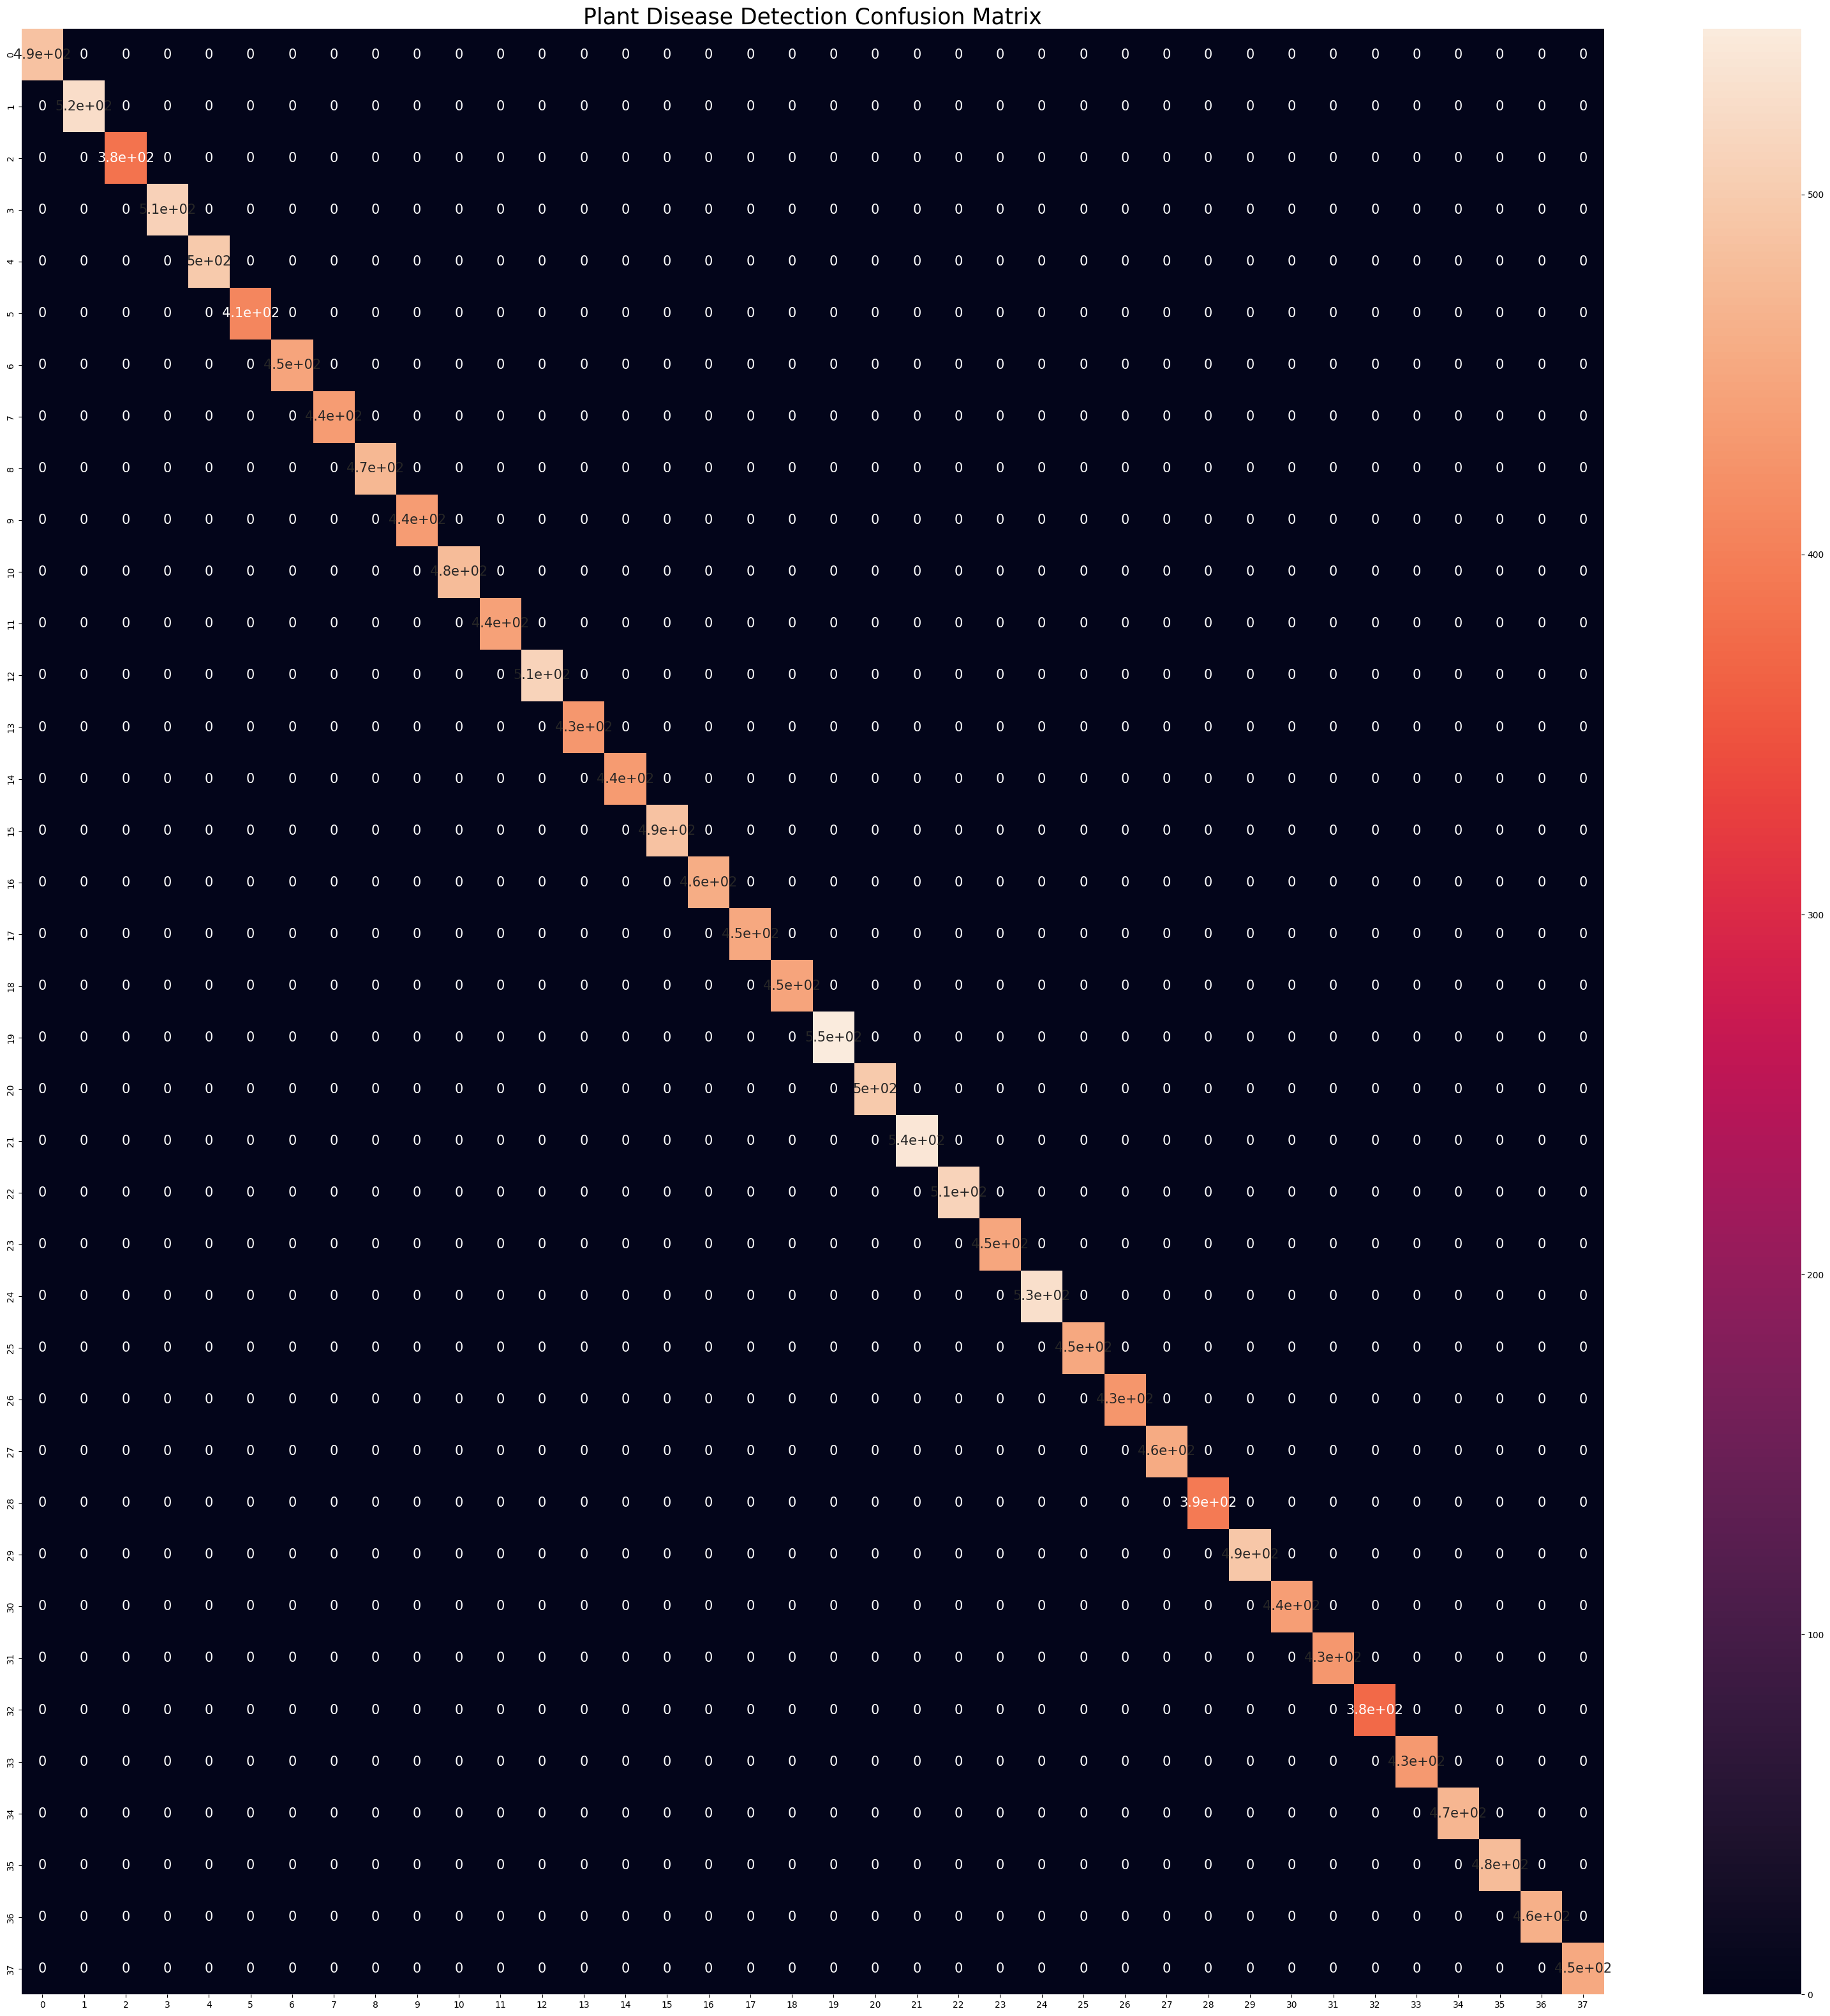

In [92]:
plt.figure(figsize=(40,40))
plt.xlabel("Predicted Class",fontsize=20)
plt.ylabel("Actual Class",fontsize=20)
plt.title("Plant Disease Detection Confusion Matrix",fontsize=25)
sns.heatmap(cm,annot=True,annot_kws={'size':15})

Test_Plant_Disease

In [93]:
#importing libraries
import numpy as np
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

Loading Model

In [94]:
model = tf.keras.models.load_model('trained_model.keras')

In [95]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 126, 126, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 32)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 63, 63, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 61, 61, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                   

Visualizing Single Image of Test Set

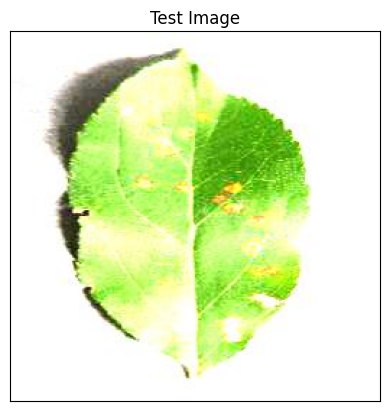

In [96]:
import cv2
image_path="test/AppleCedarRust1.JPG"
#reading Image
img=cv2.imread(image_path)
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)  #Conver BGR image to RGB

#Displaing image
plt.imshow(img)
plt.title("Test Image")
plt.xticks([])
plt.yticks([])
plt.show()

Testing Model

In [97]:
image = tf.keras.preprocessing.image.load_img(image_path,target_size=(128,128))
input_arr= tf.keras.preprocessing.image.img_to_array(image)
input_arr=np.array([input_arr])  #Convert single image to batch
print(input_arr.shape)

(1, 128, 128, 3)


In [98]:
prediction=model.predict(input_arr)
prediction,prediction.shape

1/1 [==============================] - 0s 151ms/step


(array([[2.0091768e-05, 2.0910202e-06, 9.9413824e-01, 5.3768662e-07,
         4.1226242e-04, 6.2967088e-06, 1.0889020e-08, 1.5764383e-06,
         3.8550997e-08, 8.3550518e-09, 3.4714148e-10, 2.1119190e-06,
         1.3492577e-07, 8.6646487e-08, 3.5226369e-06, 1.7975918e-06,
         1.9018731e-05, 7.6828337e-06, 6.2813187e-06, 4.6210625e-04,
         1.9310762e-06, 1.0185737e-06, 1.0839972e-06, 7.8823297e-07,
         1.1411906e-07, 1.7058233e-07, 5.3400373e-07, 1.9091465e-06,
         1.3833993e-05, 1.2901354e-03, 2.0247961e-03, 1.1585309e-05,
         8.9336485e-05, 5.5341538e-06, 1.3377112e-03, 3.0075189e-06,
         1.2846713e-04, 4.0877921e-06]], dtype=float32),
 (1, 38))

In [99]:
result_index=np.argmax(prediction)
result_index

2

In [100]:
]class_name=['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_spider_mite',
 'Tomato___Target_Spot',
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 'Tomato___Tomato_mosaic_virus',
 'Tomato___healthy'

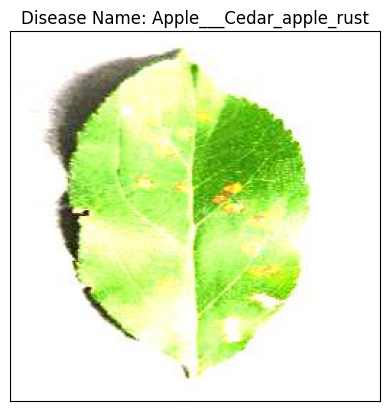

In [101]:
#Displaing Result of disease prediction
model_prediction=class_name[result_index]
plt.imshow(img)
plt.title(f"Disease Name: {model_prediction}")
plt.xticks([])
plt.yticks([])
plt.show()

In [102]:
model_prediction

'Apple___Cedar_apple_rust'